**Deep Learning Project**

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Face Mask** **Dataset**

In [ ]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 96% 156M/163M [00:00<00:00, 184MB/s]
100% 163M/163M [00:00<00:00, 182MB/s]


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the** **Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3148.jpg', 'with_mask_183.jpg', 'with_mask_3289.jpg', 'with_mask_1238.jpg', 'with_mask_579.jpg']
['with_mask_987.jpg', 'with_mask_609.jpg', 'with_mask_1946.jpg', 'with_mask_2300.jpg', 'with_mask_309.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3060.jpg', 'without_mask_3744.jpg', 'without_mask_1596.jpg', 'without_mask_62.jpg', 'without_mask_3680.jpg']
['without_mask_1292.jpg', 'without_mask_117.jpg', 'without_mask_2787.jpg', 'without_mask_1492.jpg', 'without_mask_2669.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating labels for the two class of image**

with mask->1

without mask->0

In [ ]:
# create the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


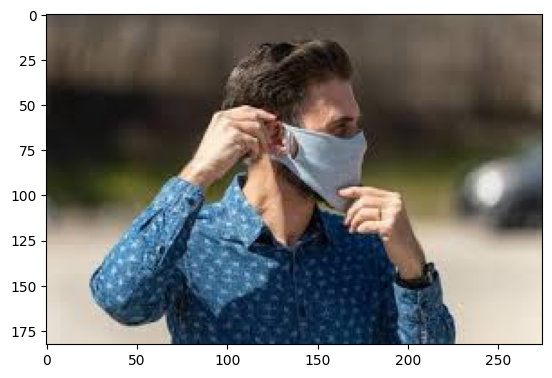

In [ ]:
# displaying with mask image
img = npimg.imread('/content/data/with_mask/with_mask_2590.jpg')
imgplot = plt.imshow(img)
plt.show()

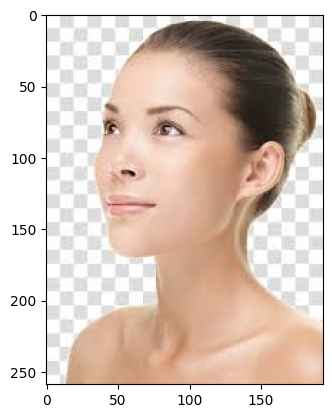

In [ ]:
# displaying without mask image
img = npimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**


1. Resize the images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays

with_mask_path  = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path  = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
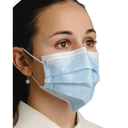

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test** **Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.14901961, 0.20392157, 0.14117647],
        [0.11764706, 0.17254902, 0.10588235],
        [0.14509804, 0.20392157, 0.1254902 ],
        ...,
        [0.08627451, 0.14509804, 0.07058824],
        [0.08235294, 0.14117647, 0.06666667],
        [0.09411765, 0.15294118, 0.0745098 ]],

       [[0.1372549 , 0.19607843, 0.10980392],
        [0.11372549, 0.17254902, 0.08627451],
        [0.16470588, 0.22352941, 0.1254902 ],
        ...,
        [0.09019608, 0.14901961, 0.0745098 ],
        [0.09411765, 0.15294118, 0.08235294],
        [0.10588235, 0.16470588, 0.08627451]],

       [[0.12156863, 0.18039216, 0.08235294],
        [0.10588235, 0.16862745, 0.0627451 ],
        [0.16862745, 0.23137255, 0.11764706],
        ...,
        [0.12156863, 0.18039216, 0.09803922],
        [0.13333333, 0.19215686, 0.10980392],
        [0.1372549 , 0.19607843, 0.10588235]],

       ...,

       [[0.76862745, 0.8745098 , 0.98823529],
        [0.73333333, 0.85490196, 0.98039216],
        [0.65098039, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
 num_of_classes = 2

 model = keras.Sequential()

 model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
 model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

 model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
 model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

 model.add(keras.layers.Flatten())

 model.add(keras.layers.Dense(128, activation='relu'))
 model.add(keras.layers.Dropout(0.5))

 model.add(keras.layers.Dense(64, activation='relu'))
 model.add(keras.layers.Dropout(0.5))

 model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs = 5)

Epoch 1/5
170/170 [==============================] - 141s 832ms/step - loss: 0.1407 - acc: 0.9474 - val_loss: 0.2937 - val_acc: 0.9157
Epoch 2/5
170/170 [==============================] - 125s 735ms/step - loss: 0.1384 - acc: 0.9479 - val_loss: 0.2132 - val_acc: 0.9322
Epoch 3/5
170/170 [==============================] - 127s 748ms/step - loss: 0.1125 - acc: 0.9638 - val_loss: 0.2477 - val_acc: 0.9339
Epoch 4/5
170/170 [==============================] - 124s 728ms/step - loss: 0.0972 - acc: 0.9682 - val_loss: 0.2257 - val_acc: 0.9306
Epoch 5/5
170/170 [==============================] - 126s 739ms/step - loss: 0.0830 - acc: 0.9709 - val_loss: 0.2553 - val_acc: 0.9438


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy =', accuracy)

48/48 [==============================] - 9s 180ms/step - loss: 0.2292 - acc: 0.9318
Test accuracy = 0.9318332076072693


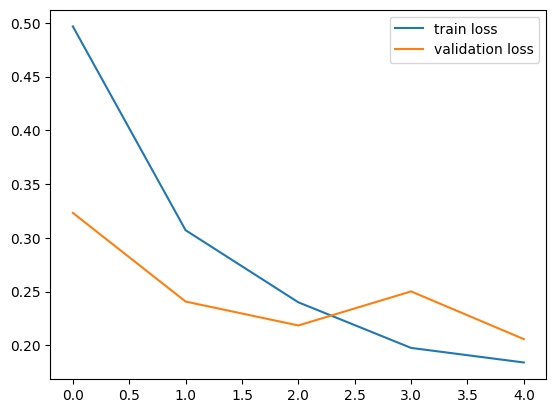

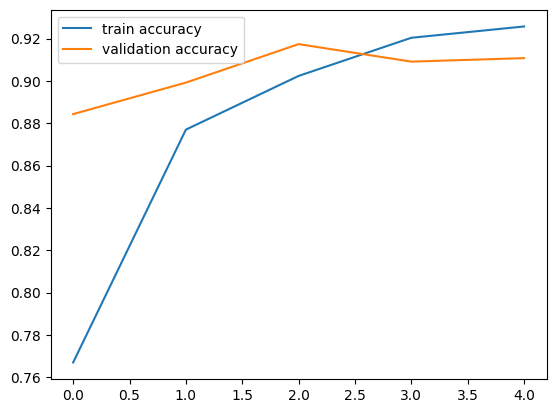

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/withmask.jpg


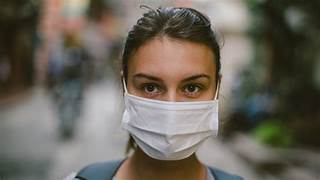

1/1 [==============================] - 0s 464ms/step
[[0.48748586 0.513296  ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

    print('The person in the image is not wearing a mask')